## Load Data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("./data"))

items_df = pd.read_csv('./data/items.csv')
shops_df = pd.read_csv('./data/shops.csv')

icats_df = pd.read_csv('./data/item_categories.csv')
train_df = pd.read_csv('./data/sales_train.csv', header=0, sep=',', quotechar='"')
smpsb_df = pd.read_csv('./data/sample_submission.csv', header=0, sep=',', quotechar='"')
test_df  = pd.read_csv('./data/test.csv', header=0, sep=',', quotechar='"')
# Any results you write to the current directory are saved as output.

['X_train_all.csv', 'sales_train.csv', 'shops.csv', 'test.csv', 'item_categories.csv', 'X_validation_new.csv', 'X_train.csv', 'y_validation.csv', 'X_test_new.csv', 'items.csv', 'y_train.csv', 'X_train_new.csv', 'X_test.csv', 'sample_submission.csv', 'X_validation.csv', 'y_train_all.csv']


In [2]:
items_df.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [3]:
items_df.shape

(22170, 3)

In [4]:
shops_df.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [5]:
shops_df.shape

(60, 2)

In [6]:
icats_df.head(10)

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
5,Аксессуары - PSVita,5
6,Аксессуары - XBOX 360,6
7,Аксессуары - XBOX ONE,7
8,Билеты (Цифра),8
9,Доставка товара,9


In [7]:
icats_df.shape

(84, 2)

In [8]:
train_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [9]:
train_df.shape

(2935849, 6)

In [10]:
smpsb_df.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [11]:
smpsb_df.shape

(214200, 2)

In [12]:
test_df.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [13]:
test_df.shape

(214200, 3)

## Map Items Categorries
Map Cattegories to more narrow ones

In [14]:
l = list(icats_df.item_category_name)
l_cat = l

for ind in range(1,8):
    l_cat[ind] = 'Access'

for ind in range(10,18):
    l_cat[ind] = 'Consoles'

for ind in range(18,25):
    l_cat[ind] = 'Consoles Games'

for ind in range(26,28):
    l_cat[ind] = 'phone games'

for ind in range(28,32):
    l_cat[ind] = 'CD games'

for ind in range(32,37):
    l_cat[ind] = 'Card'

for ind in range(37,43):
    l_cat[ind] = 'Movie'

for ind in range(43,55):
    l_cat[ind] = 'Books'

for ind in range(55,61):
    l_cat[ind] = 'Music'

for ind in range(61,73):
    l_cat[ind] = 'Gifts'

for ind in range(73,79):
    l_cat[ind] = 'Soft'


icats_df['cats'] = l_cat
icats_df.head()

,item_category_name,item_category_id,cats
0,PC - Гарнитуры/Наушники,0,PC - Гарнитуры/Наушники
1,Аксессуары - PS2,1,Access
2,Аксессуары - PS3,2,Access
3,Аксессуары - PS4,3,Access
4,Аксессуары - PSP,4,Access


In [15]:
items_df = pd.merge(items_df, icats_df, on=['item_category_id'], how='left')

In [16]:
items_df = items_df[['item_id', 'cats']]
items_df.head()

,item_id,cats
0,0,Movie
1,1,Soft
2,2,Movie
3,3,Movie
4,4,Movie


## EDA

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
train_df.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [19]:
items_df.cats.unique().shape

(20,)

In [20]:
train_df.shop_id.unique().shape

(60,)

In [21]:
test_df.shop_id.unique().shape

(42,)

Do all the shop ids in test data appear in train data?

In [22]:
set(test_df.shop_id.unique()) < set(train_df.shop_id.unique())

True

In [23]:
test_df.item_id.unique().shape

(5100,)

In [24]:
test_df.shop_id.unique().shape

(42,)

In [25]:
assert 5100 * 42 == len(test_df)

In [26]:
train_df.item_id.unique().shape

(21807,)

Do all the item ids in test data appear in train data?

In [27]:
set(test_df.item_id.unique()) < set(train_df.item_id.unique())

False

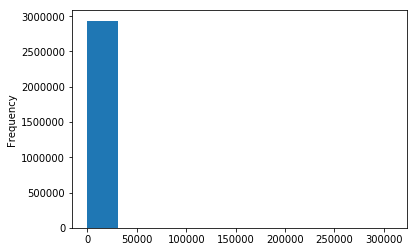

In [28]:
train_df.item_price.plot.hist(bins=10)

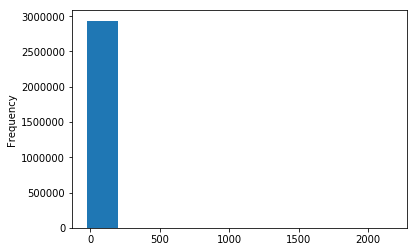

In [29]:
train_df.item_cnt_day.plot.hist()

## Remove Outliers

In [30]:
train_df = train_df[train_df['item_price'] < 100000]
train_df = train_df[train_df['item_cnt_day'] < 1000]
train_df.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935846e+06,2.935846e+06,2.935846e+06,2.935846e+06,2.935846e+06
mean,1.456990e+01,3.300175e+01,1.019722e+04,8.907492e+02,1.241562e+00
std,9.422985e+00,1.622697e+01,6.324297e+03,1.720491e+03,2.217636e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,5.920000e+04,6.690000e+02


## Aggregate training data

Create grid using all the shop_id, item_id combiation for each date_block_num

In [31]:
from itertools import product
index_cols = ['shop_id', 'item_id', 'date_block_num']
grid = []
for block_num in train_df['date_block_num'].unique():
    cur_shops = train_df.loc[train_df['date_block_num'] == block_num, 'shop_id'].unique()
    cur_items = train_df.loc[train_df['date_block_num'] == block_num, 'item_id'].unique()
    grid.append(np.array(list(product(*[cur_shops, cur_items, [block_num]])),dtype='int32'))
grid = pd.DataFrame(np.vstack(grid), columns = index_cols,dtype=np.int32)

In [32]:
train_df = train_df.groupby(['date_block_num','shop_id','item_id']).agg(
    {'item_cnt_day': np.sum, 'item_price': np.mean}).reset_index()

In [33]:
train_df.rename({'item_cnt_day': 'item_cnt_month'}, axis='columns', inplace=True)

In [34]:
train_df = pd.merge(grid, train_df, on=index_cols, how='left')

In [35]:
train_df.describe()

,shop_id,item_id,date_block_num,item_cnt_month,item_price
count,1.091380e+07,1.091380e+07,1.091380e+07,1.609122e+06,1.609122e+06
mean,3.118720e+01,1.130929e+04,1.497336e+01,2.265233e+00,7.906943e+02
std,1.734959e+01,6.209982e+03,9.495635e+00,8.429583e+00,1.532592e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,-2.200000e+01,9.000000e-02
25%,1.600000e+01,5.976000e+03,7.000000e+00,1.000000e+00,1.990000e+02
50%,3.000000e+01,1.139100e+04,1.400000e+01,1.000000e+00,3.990000e+02
75%,4.600000e+01,1.660500e+04,2.300000e+01,2.000000e+00,8.985000e+02
max,5.900000e+01,2.216900e+04,3.300000e+01,1.644000e+03,5.099900e+04


## Add category id to each data point.

In [36]:
train_df = pd.merge(train_df, items_df, on=['item_id'], how='left')

In [37]:
test_df = pd.merge(test_df, items_df, on=['item_id'], how='left')

In [38]:
train_df.head()

,shop_id,item_id,date_block_num,item_cnt_month,item_price,cats
0,59,22154,0,1.0,999.0,Movie
1,59,2552,0,NaN,NaN,Music
2,59,2554,0,NaN,NaN,Music
3,59,2555,0,NaN,NaN,Music
4,59,2564,0,NaN,NaN,Music


In [39]:
test_df.head()

,ID,shop_id,item_id,cats
0,0,5,5037,Consoles Games
1,1,5,5320,Music
2,2,5,5233,Consoles Games
3,3,5,5232,Consoles Games
4,4,5,5268,Consoles Games


In [40]:
set(test_df.cats.unique()) < set(train_df.cats.unique())

True

## Mean encoding

In [41]:
for type_ids in [['item_id'], ['shop_id'], ['cats'], ['item_id', 'shop_id']]:
    for column_id in ['item_price', 'item_cnt_month']:
        mean_df = train_df[type_ids + [column_id]].groupby(type_ids).agg(np.mean).reset_index()
        mean_df.rename(
            {column_id: "mean_of_"+column_id+"_groupby_"+"_".join(type_ids)},
            axis='columns', inplace=True
        )
        
        train_df = pd.merge(train_df, mean_df, on=type_ids, how='left')
        test_df = pd.merge(test_df, mean_df, on=type_ids, how='left')

In [42]:
train_df.describe()

,shop_id,item_id,date_block_num,item_cnt_month,item_price,mean_of_item_price_groupby_item_id,mean_of_item_cnt_month_groupby_item_id,mean_of_item_price_groupby_shop_id,mean_of_item_cnt_month_groupby_shop_id,mean_of_item_price_groupby_cats,mean_of_item_cnt_month_groupby_cats,mean_of_item_price_groupby_item_id_shop_id,mean_of_item_cnt_month_groupby_item_id_shop_id
count,1.091380e+07,1.091380e+07,1.091380e+07,1.609122e+06,1.609122e+06,1.091380e+07,1.091380e+07,1.091380e+07,1.091380e+07,1.091380e+07,1.091380e+07,6.288341e+06,6.288341e+06
mean,3.118720e+01,1.130929e+04,1.497336e+01,2.265233e+00,7.906943e+02,6.827821e+02,1.810334e+00,8.239197e+02,2.173506e+00,6.733016e+02,2.165103e+00,6.970326e+02,1.602656e+00
std,1.734959e+01,6.209982e+03,9.495635e+00,8.429583e+00,1.532592e+03,1.363974e+03,5.518281e+00,1.668937e+02,6.904852e-01,1.093747e+03,2.459068e+00,1.388719e+03,3.709803e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-2.200000e+01,9.000000e-02,4.896430e+00,-2.200000e+00,3.005999e+02,1.279070e+00,3.366439e+01,1.000000e+00,9.000000e-02,-3.500000e+00
25%,1.600000e+01,5.976000e+03,7.000000e+00,1.000000e+00,1.990000e+02,1.942063e+02,1.090909e+00,7.572104e+02,1.809250e+00,3.405099e+02,1.680894e+00,1.990000e+02,1.000000e+00
50%,3.000000e+01,1.139100e+04,1.400000e+01,1.000000e+00,3.990000e+02,3.001633e+02,1.225490e+00,8.251514e+02,2.043924e+00,3.726226e+02,1.745858e+00,3.140000e+02,1.000000e+00
75%,4.600000e+01,1.660500e+04,2.300000e+01,2.000000e+00,8.985000e+02,7.017879e+02,1.585714e+00,8.760895e+02,2.211633e+00,8.596175e+02,2.633343e+00,6.990000e+02,1.500000e+00
max,5.900000e+01,2.216900e+04,3.300000e+01,1.644000e+03,5.099900e+04,5.099900e+04,6.220000e+02,1.438481e+03,9.972344e+00,1.382318e+04,7.895545e+01,5.099900e+04,6.644667e+02


In [43]:
test_df.describe()

,ID,shop_id,item_id,mean_of_item_price_groupby_item_id,mean_of_item_cnt_month_groupby_item_id,mean_of_item_price_groupby_shop_id,mean_of_item_cnt_month_groupby_shop_id,mean_of_item_price_groupby_cats,mean_of_item_cnt_month_groupby_cats,mean_of_item_price_groupby_item_id_shop_id,mean_of_item_cnt_month_groupby_item_id_shop_id
count,214200.000000,214200.000000,214200.000000,198954.000000,198954.000000,214200.000000,214200.000000,214200.000000,214200.000000,111404.000000,111404.000000
mean,107099.500000,31.642857,11019.398627,1024.694159,2.277038,863.183539,2.127632,756.945382,2.336335,992.405095,1.902407
std,61834.358168,17.561933,6252.644590,1979.721761,5.627254,164.626848,0.599815,1078.297950,3.130990,1890.474881,4.649952
min,0.000000,2.000000,30.000000,4.896430,0.666667,523.952475,1.279070,87.800000,1.000000,0.990000,0.000000
25%,53549.750000,16.000000,5381.500000,281.109010,1.172297,770.380085,1.799914,340.509868,1.680894,299.000000,1.000000
50%,107099.500000,34.500000,11203.000000,488.362500,1.418182,831.600466,2.024027,372.622621,1.745858,472.502381,1.200000
75%,160649.250000,47.000000,16071.500000,1247.578836,2.014851,943.030349,2.154723,859.617546,2.883084,1129.000000,1.857143
max,214199.000000,59.000000,22167.000000,40453.407407,181.264706,1335.210545,4.965377,13823.183217,78.955446,42990.000000,664.466667


## Fillna

In [44]:
test_df['mean_of_item_price_groupby_item_id'] = test_df['mean_of_item_price_groupby_item_id'].fillna(test_df['mean_of_item_price_groupby_cats'])
test_df['mean_of_item_cnt_month_groupby_item_id'] = test_df['mean_of_item_cnt_month_groupby_item_id'].fillna(test_df['mean_of_item_cnt_month_groupby_cats'])
test_df['mean_of_item_price_groupby_item_id_shop_id'] = test_df['mean_of_item_price_groupby_item_id_shop_id'].fillna(test_df['mean_of_item_price_groupby_item_id'])
test_df['mean_of_item_cnt_month_groupby_item_id_shop_id'] = test_df['mean_of_item_cnt_month_groupby_item_id_shop_id'].fillna(test_df['mean_of_item_cnt_month_groupby_item_id'])

In [45]:
train_df['mean_of_item_price_groupby_item_id_shop_id'] = train_df['mean_of_item_price_groupby_item_id_shop_id'].fillna(train_df['mean_of_item_price_groupby_item_id'])
train_df['mean_of_item_cnt_month_groupby_item_id_shop_id'] = train_df['mean_of_item_cnt_month_groupby_item_id_shop_id'].fillna(train_df['mean_of_item_cnt_month_groupby_item_id'])

In [46]:
train_df.columns

Index(['shop_id', 'item_id', 'date_block_num', 'item_cnt_month', 'item_price',
       'cats', 'mean_of_item_price_groupby_item_id',
       'mean_of_item_cnt_month_groupby_item_id',
       'mean_of_item_price_groupby_shop_id',
       'mean_of_item_cnt_month_groupby_shop_id',
       'mean_of_item_price_groupby_cats',
       'mean_of_item_cnt_month_groupby_cats',
       'mean_of_item_price_groupby_item_id_shop_id',
       'mean_of_item_cnt_month_groupby_item_id_shop_id'],
      dtype='object')

In [47]:
for df in train_df, test_df:
    for feat in df.columns[4:]:
        if 'item_cnt' in feat:
            df[feat]=df[feat].fillna(0)
        elif 'item_price' in feat:
            df[feat]=df[feat].fillna(df[feat].median())

In [48]:
train_df['item_cnt_month'] = train_df['item_cnt_month'].fillna(0)

In [49]:
train_df.describe()

,shop_id,item_id,date_block_num,item_cnt_month,item_price,mean_of_item_price_groupby_item_id,mean_of_item_cnt_month_groupby_item_id,mean_of_item_price_groupby_shop_id,mean_of_item_cnt_month_groupby_shop_id,mean_of_item_price_groupby_cats,mean_of_item_cnt_month_groupby_cats,mean_of_item_price_groupby_item_id_shop_id,mean_of_item_cnt_month_groupby_item_id_shop_id
count,1.091380e+07,1.091380e+07,1.091380e+07,1.091380e+07,1.091380e+07,1.091380e+07,1.091380e+07,1.091380e+07,1.091380e+07,1.091380e+07,1.091380e+07,1.091380e+07,1.091380e+07
mean,3.118720e+01,1.130929e+04,1.497336e+01,3.339840e-01,4.567511e+02,6.827821e+02,1.810334e+00,8.239197e+02,2.173506e+00,6.733016e+02,2.165103e+00,6.810080e+02,1.733548e+00
std,1.734959e+01,6.209982e+03,9.495635e+00,3.334923e+00,6.046454e+02,1.363974e+03,5.518281e+00,1.668937e+02,6.904852e-01,1.093747e+03,2.459068e+00,1.364772e+03,5.861127e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-2.200000e+01,9.000000e-02,4.896430e+00,-2.200000e+00,3.005999e+02,1.279070e+00,3.366439e+01,1.000000e+00,9.000000e-02,-3.500000e+00
25%,1.600000e+01,5.976000e+03,7.000000e+00,0.000000e+00,3.990000e+02,1.942063e+02,1.090909e+00,7.572104e+02,1.809250e+00,3.405099e+02,1.680894e+00,1.959215e+02,1.000000e+00
50%,3.000000e+01,1.139100e+04,1.400000e+01,0.000000e+00,3.990000e+02,3.001633e+02,1.225490e+00,8.251514e+02,2.043924e+00,3.726226e+02,1.745858e+00,2.990000e+02,1.111111e+00
75%,4.600000e+01,1.660500e+04,2.300000e+01,0.000000e+00,3.990000e+02,7.017879e+02,1.585714e+00,8.760895e+02,2.211633e+00,8.596175e+02,2.633343e+00,6.990000e+02,1.467626e+00
max,5.900000e+01,2.216900e+04,3.300000e+01,1.644000e+03,5.099900e+04,5.099900e+04,6.220000e+02,1.438481e+03,9.972344e+00,1.382318e+04,7.895545e+01,5.099900e+04,6.644667e+02


In [50]:
train_df.columns

Index(['shop_id', 'item_id', 'date_block_num', 'item_cnt_month', 'item_price',
       'cats', 'mean_of_item_price_groupby_item_id',
       'mean_of_item_cnt_month_groupby_item_id',
       'mean_of_item_price_groupby_shop_id',
       'mean_of_item_cnt_month_groupby_shop_id',
       'mean_of_item_price_groupby_cats',
       'mean_of_item_cnt_month_groupby_cats',
       'mean_of_item_price_groupby_item_id_shop_id',
       'mean_of_item_cnt_month_groupby_item_id_shop_id'],
      dtype='object')

## Add previous months sales data

In [51]:
train_df_temp = train_df.copy()
train_df = train_df[train_df['date_block_num']>=12]

In [52]:
features = ['item_cnt_month', 'item_price', 'mean_of_item_price_groupby_item_id',
       'mean_of_item_cnt_month_groupby_item_id',
       'mean_of_item_price_groupby_shop_id',
       'mean_of_item_cnt_month_groupby_shop_id',
       'mean_of_item_price_groupby_cats',
       'mean_of_item_cnt_month_groupby_cats',
       'mean_of_item_price_groupby_item_id_shop_id',
       'mean_of_item_cnt_month_groupby_item_id_shop_id']

In [53]:
def add_historical_data(df):
    for diff in (1, 2, 3, 4, 6, 12):
        train_df_copy = train_df_temp.copy()
        train_df_copy['date_block_num'] += diff
        train_df_copy = train_df_copy[['date_block_num', 'item_id', 'shop_id'] + features]
        train_df_copy.rename({
            feat: feat+"_"+str(diff)+'_month_ago' for feat in features
        }, axis=1, inplace=True)
        df = pd.merge(df, train_df_copy, on=['shop_id', 'item_id', 'date_block_num'], how='left')
    return df

In [54]:
test_df['date_block_num'] = 34
train_df = add_historical_data(train_df)
test_df = add_historical_data(test_df)
test_df.drop('date_block_num', axis=1, inplace=True)

In [55]:
train_df.head()

,shop_id,item_id,date_block_num,item_cnt_month,item_price,cats,mean_of_item_price_groupby_item_id,mean_of_item_cnt_month_groupby_item_id,mean_of_item_price_groupby_shop_id,mean_of_item_cnt_month_groupby_shop_id,...,item_cnt_month_12_month_ago,item_price_12_month_ago,mean_of_item_price_groupby_item_id_12_month_ago,mean_of_item_cnt_month_groupby_item_id_12_month_ago,mean_of_item_price_groupby_shop_id_12_month_ago,mean_of_item_cnt_month_groupby_shop_id_12_month_ago,mean_of_item_price_groupby_cats_12_month_ago,mean_of_item_cnt_month_groupby_cats_12_month_ago,mean_of_item_price_groupby_item_id_shop_id_12_month_ago,mean_of_item_cnt_month_groupby_item_id_shop_id_12_month_ago
0,54,10297,12,4.0,749.0,Movie,709.478496,1.210526,655.04886,2.636404,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,54,10296,12,3.0,1599.0,Movie,1464.972764,1.130081,655.04886,2.636404,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,54,10298,12,14.0,399.0,Movie,223.781333,4.821380,655.04886,2.636404,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,54,10300,12,3.0,699.0,Movie,519.571884,2.520833,655.04886,2.636404,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,54,10284,12,1.0,299.0,Music,284.902913,1.174757,655.04886,2.636404,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Fill na

In [56]:
train_df.columns

Index(['shop_id', 'item_id', 'date_block_num', 'item_cnt_month', 'item_price',
       'cats', 'mean_of_item_price_groupby_item_id',
       'mean_of_item_cnt_month_groupby_item_id',
       'mean_of_item_price_groupby_shop_id',
       'mean_of_item_cnt_month_groupby_shop_id',
       'mean_of_item_price_groupby_cats',
       'mean_of_item_cnt_month_groupby_cats',
       'mean_of_item_price_groupby_item_id_shop_id',
       'mean_of_item_cnt_month_groupby_item_id_shop_id',
       'item_cnt_month_1_month_ago', 'item_price_1_month_ago',
       'mean_of_item_price_groupby_item_id_1_month_ago',
       'mean_of_item_cnt_month_groupby_item_id_1_month_ago',
       'mean_of_item_price_groupby_shop_id_1_month_ago',
       'mean_of_item_cnt_month_groupby_shop_id_1_month_ago',
       'mean_of_item_price_groupby_cats_1_month_ago',
       'mean_of_item_cnt_month_groupby_cats_1_month_ago',
       'mean_of_item_price_groupby_item_id_shop_id_1_month_ago',
       'mean_of_item_cnt_month_groupby_item_id_shop

In [57]:
for df in train_df, test_df:
    for feat in train_df.columns[6:]:
        if 'item_cnt' in feat:
            df[feat]=df[feat].fillna(0)
        elif 'item_price' in feat:
            df[feat]=df[feat].fillna(df[feat].median())

## Add some pair-difference features

In [58]:
columns = {
    'diff_between_item_shop_and_item': ('mean_of_item_price_groupby_item_id_shop_id', 'mean_of_item_price_groupby_item_id'),
    'diff_between_item_and_category': ('mean_of_item_price_groupby_item_id', 'mean_of_item_price_groupby_cats')
}
for new_feature, (col1, col2) in columns.items():
    for df in (train_df, test_df):
        df[new_feature] = df[col1] - df[col2]

In [59]:
train_df.head()

,shop_id,item_id,date_block_num,item_cnt_month,item_price,cats,mean_of_item_price_groupby_item_id,mean_of_item_cnt_month_groupby_item_id,mean_of_item_price_groupby_shop_id,mean_of_item_cnt_month_groupby_shop_id,...,mean_of_item_price_groupby_item_id_12_month_ago,mean_of_item_cnt_month_groupby_item_id_12_month_ago,mean_of_item_price_groupby_shop_id_12_month_ago,mean_of_item_cnt_month_groupby_shop_id_12_month_ago,mean_of_item_price_groupby_cats_12_month_ago,mean_of_item_cnt_month_groupby_cats_12_month_ago,mean_of_item_price_groupby_item_id_shop_id_12_month_ago,mean_of_item_cnt_month_groupby_item_id_shop_id_12_month_ago,diff_between_item_shop_and_item,diff_between_item_and_category
0,54,10297,12,4.0,749.0,Movie,709.478496,1.210526,655.04886,2.636404,...,296.188435,0.0,825.151374,0.0,372.622621,0.0,299.0,0.0,39.521504,368.968628
1,54,10296,12,3.0,1599.0,Movie,1464.972764,1.130081,655.04886,2.636404,...,296.188435,0.0,825.151374,0.0,372.622621,0.0,299.0,0.0,62.185807,1124.462896
2,54,10298,12,14.0,399.0,Movie,223.781333,4.821380,655.04886,2.636404,...,296.188435,0.0,825.151374,0.0,372.622621,0.0,299.0,0.0,12.277491,-116.728536
3,54,10300,12,3.0,699.0,Movie,519.571884,2.520833,655.04886,2.636404,...,296.188435,0.0,825.151374,0.0,372.622621,0.0,299.0,0.0,-18.620813,179.062016
4,54,10284,12,1.0,299.0,Music,284.902913,1.174757,655.04886,2.636404,...,296.188435,0.0,825.151374,0.0,372.622621,0.0,299.0,0.0,14.097087,-87.719709


In [60]:
test_df.head()

,ID,shop_id,item_id,cats,mean_of_item_price_groupby_item_id,mean_of_item_cnt_month_groupby_item_id,mean_of_item_price_groupby_shop_id,mean_of_item_cnt_month_groupby_shop_id,mean_of_item_price_groupby_cats,mean_of_item_cnt_month_groupby_cats,...,mean_of_item_price_groupby_item_id_12_month_ago,mean_of_item_cnt_month_groupby_item_id_12_month_ago,mean_of_item_price_groupby_shop_id_12_month_ago,mean_of_item_cnt_month_groupby_shop_id_12_month_ago,mean_of_item_price_groupby_cats_12_month_ago,mean_of_item_cnt_month_groupby_cats_12_month_ago,mean_of_item_price_groupby_item_id_shop_id_12_month_ago,mean_of_item_cnt_month_groupby_item_id_shop_id_12_month_ago,diff_between_item_shop_and_item,diff_between_item_and_category
0,0,5,5037,Consoles Games,1960.580473,2.873303,804.758232,1.773768,1537.789180,2.633343,...,1960.580473,2.873303,804.758232,1.773768,1537.789180,2.633343,1693.518519,1.444444,-267.061955,422.791294
1,1,5,5320,Music,372.622621,1.379644,804.758232,1.773768,372.622621,1.379644,...,399.968818,0.000000,830.860711,0.000000,372.622621,0.000000,399.000000,0.000000,0.000000,0.000000
2,2,5,5233,Consoles Games,844.516003,2.668421,804.758232,1.773768,1537.789180,2.633343,...,399.968818,0.000000,830.860711,0.000000,372.622621,0.000000,399.000000,0.000000,14.483997,-693.273177
3,3,5,5232,Consoles Games,792.527697,1.855263,804.758232,1.773768,1537.789180,2.633343,...,399.968818,0.000000,830.860711,0.000000,372.622621,0.000000,399.000000,0.000000,-193.527697,-745.261482
4,4,5,5268,Consoles Games,1537.789180,2.633343,804.758232,1.773768,1537.789180,2.633343,...,399.968818,0.000000,830.860711,0.000000,372.622621,0.000000,399.000000,0.000000,0.000000,0.000000


## Clip the values of the target

In [61]:
train_df['item_cnt_month'] = train_df['item_cnt_month'].clip(0, 20)

## Split into training set and validation set

In [62]:
training_set = train_df[train_df['date_block_num']<33]
validation_set = train_df[train_df['date_block_num']==33].reset_index()

In [63]:
validation_set.head()

,index,shop_id,item_id,date_block_num,item_cnt_month,item_price,cats,mean_of_item_price_groupby_item_id,mean_of_item_cnt_month_groupby_item_id,mean_of_item_price_groupby_shop_id,...,mean_of_item_price_groupby_item_id_12_month_ago,mean_of_item_cnt_month_groupby_item_id_12_month_ago,mean_of_item_price_groupby_shop_id_12_month_ago,mean_of_item_cnt_month_groupby_shop_id_12_month_ago,mean_of_item_price_groupby_cats_12_month_ago,mean_of_item_cnt_month_groupby_cats_12_month_ago,mean_of_item_price_groupby_item_id_shop_id_12_month_ago,mean_of_item_cnt_month_groupby_item_id_shop_id_12_month_ago,diff_between_item_shop_and_item,diff_between_item_and_category
0,6186922,45,13315,33,1.0,649.0,Books,640.875000,1.125000,861.189864,...,296.188435,0.000000,825.151374,0.00000,372.622621,0.000000,299.000000,0.000000,8.125000,290.090958
1,6186923,45,13880,33,1.0,229.0,Music,208.925643,2.561828,861.189864,...,208.925643,2.561828,861.189864,1.80925,372.622621,1.379644,214.000000,1.800000,5.074357,-163.696979
2,6186924,45,13881,33,2.0,659.0,Music,579.715439,2.710271,861.189864,...,579.715439,2.710271,861.189864,1.80925,372.622621,1.379644,588.300000,1.960000,8.584561,207.092817
3,6186925,45,13923,33,1.0,169.0,Movie,150.236386,1.572183,861.189864,...,150.236386,1.572183,861.189864,1.80925,340.509868,1.745858,157.571429,1.142857,7.335042,-190.273482
4,6186926,45,14227,33,1.0,99.0,CD games,97.129878,3.462963,861.189864,...,97.129878,3.462963,861.189864,1.80925,520.312473,3.636535,99.000000,1.750000,1.870122,-423.182595


## Only keep the useful columns

In [71]:
features = train_df.columns[6:].tolist()

In [72]:
train_df[features].to_csv('./data/X_train_all.csv', index=False)
train_df['item_cnt_month'].to_csv('./data/y_train_all.csv', index=False)
X_train = training_set[features]
X_train.to_csv('./data/X_train.csv', index=False)
y_train = training_set['item_cnt_month']
y_train.to_csv('./data/y_train.csv', index=False)
X_validation = validation_set[features]
X_validation.to_csv('./data/X_validation.csv', index=False)
y_validation = validation_set['item_cnt_month']
y_validation.to_csv('./data/y_validation.csv', index=False)
test_df = test_df[['ID'] + features]
test_df.to_csv('./data/X_test.csv', index=False)

## xgboost model

In [73]:
import xgboost as xgb

/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [74]:
train_df.head()

,shop_id,item_id,date_block_num,item_cnt_month,item_price,cats,mean_of_item_price_groupby_item_id,mean_of_item_cnt_month_groupby_item_id,mean_of_item_price_groupby_shop_id,mean_of_item_cnt_month_groupby_shop_id,...,mean_of_item_price_groupby_item_id_12_month_ago,mean_of_item_cnt_month_groupby_item_id_12_month_ago,mean_of_item_price_groupby_shop_id_12_month_ago,mean_of_item_cnt_month_groupby_shop_id_12_month_ago,mean_of_item_price_groupby_cats_12_month_ago,mean_of_item_cnt_month_groupby_cats_12_month_ago,mean_of_item_price_groupby_item_id_shop_id_12_month_ago,mean_of_item_cnt_month_groupby_item_id_shop_id_12_month_ago,diff_between_item_shop_and_item,diff_between_item_and_category
0,54,10297,12,4.0,749.0,Movie,709.478496,1.210526,655.04886,2.636404,...,296.188435,0.0,825.151374,0.0,372.622621,0.0,299.0,0.0,39.521504,368.968628
1,54,10296,12,3.0,1599.0,Movie,1464.972764,1.130081,655.04886,2.636404,...,296.188435,0.0,825.151374,0.0,372.622621,0.0,299.0,0.0,62.185807,1124.462896
2,54,10298,12,14.0,399.0,Movie,223.781333,4.821380,655.04886,2.636404,...,296.188435,0.0,825.151374,0.0,372.622621,0.0,299.0,0.0,12.277491,-116.728536
3,54,10300,12,3.0,699.0,Movie,519.571884,2.520833,655.04886,2.636404,...,296.188435,0.0,825.151374,0.0,372.622621,0.0,299.0,0.0,-18.620813,179.062016
4,54,10284,12,1.0,299.0,Music,284.902913,1.174757,655.04886,2.636404,...,296.188435,0.0,825.151374,0.0,372.622621,0.0,299.0,0.0,14.097087,-87.719709


In [75]:
params = {
        'eta': 0.08, #best 0.08
        'max_depth': 7,
        'objective': 'reg:linear',
        'eval_metric': 'rmse',
        'seed': 3,
        'gamma':1,
        'silent': True
    }

In [76]:
X_test = test_df[features]

In [77]:
watchlist = [
    (xgb.DMatrix(X_train, y_train), 'train'),
    (xgb.DMatrix(X_validation, y_validation), 'validation')
]
model = xgb.train(params, xgb.DMatrix(X_train, y_train), 500,  watchlist, maximize=False, verbose_eval=5, early_stopping_rounds=50)

[0]	train-rmse:1.15492	validation-rmse:1.10793
Multiple eval metrics have been passed: 'validation-rmse' will be used for early stopping.

Will train until validation-rmse hasn't improved in 50 rounds.
[5]	train-rmse:0.972058	validation-rmse:0.924231
[10]	train-rmse:0.87805	validation-rmse:0.839715
[15]	train-rmse:0.823896	validation-rmse:0.798597
[20]	train-rmse:0.796545	validation-rmse:0.779291
[25]	train-rmse:0.778307	validation-rmse:0.768394
[30]	train-rmse:0.766018	validation-rmse:0.761541
[35]	train-rmse:0.756882	validation-rmse:0.752172
[40]	train-rmse:0.750681	validation-rmse:0.748152
[45]	train-rmse:0.745364	validation-rmse:0.745806
[50]	train-rmse:0.741689	validation-rmse:0.746092
[55]	train-rmse:0.737687	validation-rmse:0.746165
[60]	train-rmse:0.733751	validation-rmse:0.74752
[65]	train-rmse:0.731123	validation-rmse:0.746142
[70]	train-rmse:0.728324	validation-rmse:0.746596
[75]	train-rmse:0.72592	validation-rmse:0.745586
[80]	train-rmse:0.723336	validation-rmse:0.745008
[8

In [78]:
pred = model.predict(xgb.DMatrix(X_test), ntree_limit=model.best_ntree_limit)
test_df['item_cnt_month'] = pred.clip(0, 40)
test_df[['ID', 'item_cnt_month']].to_csv('xgboost_submission.csv', index=False)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [79]:
test_df.head()

,ID,mean_of_item_price_groupby_item_id,mean_of_item_cnt_month_groupby_item_id,mean_of_item_price_groupby_shop_id,mean_of_item_cnt_month_groupby_shop_id,mean_of_item_price_groupby_cats,mean_of_item_cnt_month_groupby_cats,mean_of_item_price_groupby_item_id_shop_id,mean_of_item_cnt_month_groupby_item_id_shop_id,item_cnt_month_1_month_ago,...,mean_of_item_cnt_month_groupby_item_id_12_month_ago,mean_of_item_price_groupby_shop_id_12_month_ago,mean_of_item_cnt_month_groupby_shop_id_12_month_ago,mean_of_item_price_groupby_cats_12_month_ago,mean_of_item_cnt_month_groupby_cats_12_month_ago,mean_of_item_price_groupby_item_id_shop_id_12_month_ago,mean_of_item_cnt_month_groupby_item_id_shop_id_12_month_ago,diff_between_item_shop_and_item,diff_between_item_and_category,item_cnt_month
0,0,1960.580473,2.873303,804.758232,1.773768,1537.789180,2.633343,1693.518519,1.444444,0.0,...,2.873303,804.758232,1.773768,1537.789180,2.633343,1693.518519,1.444444,-267.061955,422.791294,0.671905
1,1,372.622621,1.379644,804.758232,1.773768,372.622621,1.379644,372.622621,1.379644,0.0,...,0.000000,830.860711,0.000000,372.622621,0.000000,399.000000,0.000000,0.000000,0.000000,0.007018
2,2,844.516003,2.668421,804.758232,1.773768,1537.789180,2.633343,859.000000,2.000000,1.0,...,0.000000,830.860711,0.000000,372.622621,0.000000,399.000000,0.000000,14.483997,-693.273177,1.067947
3,3,792.527697,1.855263,804.758232,1.773768,1537.789180,2.633343,599.000000,1.000000,0.0,...,0.000000,830.860711,0.000000,372.622621,0.000000,399.000000,0.000000,-193.527697,-745.261482,0.258787
4,4,1537.789180,2.633343,804.758232,1.773768,1537.789180,2.633343,1537.789180,2.633343,0.0,...,0.000000,830.860711,0.000000,372.622621,0.000000,399.000000,0.000000,0.000000,0.000000,0.091715


## Neural Network (not used in final submission)

In [ ]:
import keras
from keras.models import Sequential
import keras.layers as ll
from keras import metrics

In [ ]:
model = Sequential(name="mlp")

model.add(ll.InputLayer([20]))
# network body
model.add(ll.Dense(32))
model.add(ll.Activation('relu'))
model.add(ll.Dropout(0.5))
model.add(ll.Dense(32))
model.add(ll.Activation('relu'))
model.add(ll.Dense(1))
model.add(ll.Activation('relu'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=[metrics.mse])

In [ ]:
model.summary()

In [ ]:
model.fit(X_train.values, y_train.values,
          validation_data=(X_validation.values, y_validation.values), epochs=5)

## Stacking (takes a long time to run)

In [ ]:
X_train_new = X_train.copy()
X_validation_new = X_validation.copy()
X_test_new = X_test.copy()

Train three xgboost model with different params

In [ ]:
params1 = {
        'eta': 0.08, #best 0.08
        'max_depth': 7,
        'objective': 'reg:linear',
        'eval_metric': 'rmse',
        'seed': 3,
        'gamma':1,
        'silent': True
    }

In [ ]:
params2 = {
        'eta': 0.08, #best 0.08
        'max_depth': 8,
        'objective': 'reg:linear',
        'eval_metric': 'rmse',
        'seed': 4,
        'gamma':1,
        'silent': True
    }

In [ ]:
params3 = {
        'eta': 0.08, #best 0.08
        'max_depth': 6,
        'objective': 'reg:linear',
        'eval_metric': 'rmse',
        'seed': 5,
        'gamma':1,
        'silent': True
    }

In [ ]:
watchlist = [
    (xgb.DMatrix(X_train, y_train), 'train'),
    (xgb.DMatrix (X_validation, y_validation), 'validation')
]
for i, params in enumerate([params1, params2, params3]):
    model = xgb.train(params, xgb.DMatrix(X_train, y_train), 500,  watchlist, maximize=False, verbose_eval=50, early_stopping_rounds=50)
    X_train_new['xgboost_item_cnt_month_'+str(i)] = model.predict(xgb.DMatrix(X_train), ntree_limit=model.best_ntree_limit)
    X_validation_new['xgboost_item_cnt_month_'+str(i)] = model.predict(xgb.DMatrix(X_validation), ntree_limit=model.best_ntree_limit)
    X_test_new['xgboost_item_cnt_month_'+str(i)] = model.predict(xgb.DMatrix(X_test), ntree_limit=model.best_ntree_limit)

In [ ]:
X_test_new.head(10)

In [ ]:
X_train_new.to_csv('./data/X_train_new.csv', index=False)
X_validation_new.to_csv('./data/X_validation_new.csv', index=False)
X_test_new.to_csv('./data/X_test_new.csv', index=False)

In [ ]:
X_train_new = pd.read_csv('./data/X_train_new.csv')
X_validation_new = pd.read_csv('./data/X_validation_new.csv')
X_test_new = pd.read_csv('./data/X_test_new.csv')

Train three knn regressors

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
X_train_sample, _, y_train_sample, __ = train_test_split(X_train, y_train, train_size=.05, random_state=10)
scaler = MinMaxScaler()
scaler.fit(X_train_sample)
for k in (2, 3, 4):
    print("Training model "+str(k))
    neigh = KNeighborsRegressor(n_neighbors=k, n_jobs=4, algorithm='kd_tree')
    neigh.fit(scaler.transform(X_train_sample), y_train_sample)
    print("Using "+str(k)+" to predict")
    X_train_new[str(k)+'_neighbors'] = neigh.predict(scaler.transform(X_train))
    X_validation_new[str(k)+'_neighbors'] = neigh.predict(scaler.transform(X_validation))
    X_test_new[str(k)+'_neighbors'] = neigh.predict(scaler.transform(X_test))


Train svm regressors (not used)

In [ ]:
from sklearn.svm import SVR
scaler = MinMaxScaler()
X_train_transform = scaler.fit_transform(X_train)
X_validation_transform = scaler.transform(X_validation)
X_test_transform = scaler.transform(X_test)
for kernel in 'poly', 'rbf', 'sigmoid':
    clf = SVR(kernel=kernel, max_iter=500)
    print("Training the "+kernel+" model")
    clf.fit(X_train_transform, y_train)
    print("Using the "+kernel+" model to predict")
    X_train_new['svm_'+kernel] = clf.predict(X_train_transform)
    X_validation_new['svm_'+kernel] = clf.predict(X_validation_transform)
    X_test_new['svm_'+kernel] = clf.predict(X_test_transform)

In [ ]:
X_test_new.head(10)

In [ ]:
for df in X_train_new, X_validation_new, X_test_new:
    df.drop(['svm_poly', 'svm_rbf', 'svm_sigmoid'], axis=1, inplace=True)

Use LR to ensemble all models

In [ ]:
X_train = X_train_new
X_validation = X_validation_new
X_test = X_test_new

In [ ]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=1, copy_X=True, normalize=True, max_iter=1000)
model.fit(X_train, y_train)
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_validation, model.predict(X_validation)))

In [ ]:
pred = model.predict(X_test)
test_df['item_cnt_month'] = pred.clip(0, 40)
test_df[['ID', 'item_cnt_month']].to_csv('stacking_submission.csv', index=False)